In [19]:
## import necessary library
## Reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from openpyxl import load_workbook, workbook

In [20]:
## function of creating the confusion matrix
## Reference: https://github.com/DTrimarchi10/confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = []
        for i in range(0,len(cf)):
            row_df = cf[i,:]
            row_percentages = ["{0:.2%}".format(value) for value in row_df.flatten()/np.sum(row_df)]
            group_percentages.extend(row_percentages)
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,annot_kws={'size':16})

    if xyplotlabels:
        plt.ylabel('True label', fontsize=16)
        plt.xlabel('Predicted label' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    

[[200  24  24   2]
 [  4 187  59   0]
 [  2   3 239   6]
 [ 10  13  12 215]]


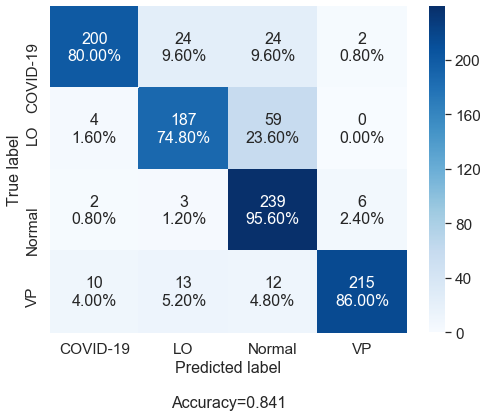

In [21]:
## Confusion matrix of original real data for all four classes
y_true = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\Fianl project\class.xlsx", "y_true")
y_pred = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\Fianl project\class.xlsx", "y_pred")
temp_1, temp_2 = y_true.iloc[:,1], y_pred.iloc[:,1]
for column in range(2,len(y_true.columns)):
    temp_1 = temp_1.append(y_true.iloc[:,column])
    temp_2 = temp_2.append(y_pred.iloc[:,column])

cf_matrix_1 = confusion_matrix(temp_1.values.copy(),temp_2.values.copy())
print(cf_matrix_1)

categories_1 = ["COVID-19","LO","Normal","VP"]
make_confusion_matrix(cf_matrix_1,categories=categories_1, figsize=(8,6), sum_stats=True)

[[200  50]
 [ 16 734]]


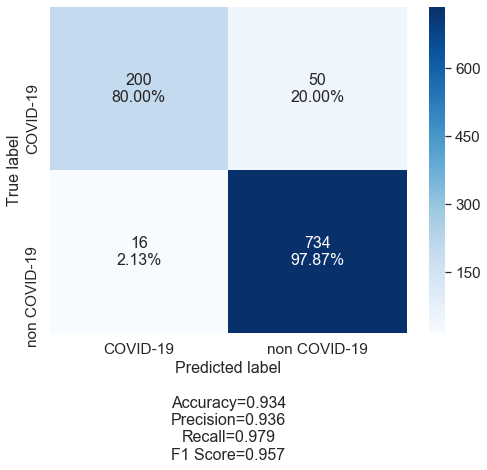

In [22]:
## Confusion matrix of original real data for COVID-19 and non-COVID-19
temp_3, temp_4 = temp_1.copy(), temp_2.copy()
temp_3[temp_3>0] , temp_4[temp_4>0] = 1, 1
cf_matrix_2 = confusion_matrix(temp_3.values.copy(),temp_4.values.copy())
print(cf_matrix_2)

categories_2 = ["COVID-19","non COVID-19"]
make_confusion_matrix(cf_matrix_2,categories=categories_2, figsize=(8,6))

[[226  11  13   0]
 [  7 206  35   2]
 [  4  22 223   1]
 [  6   2   4 238]]


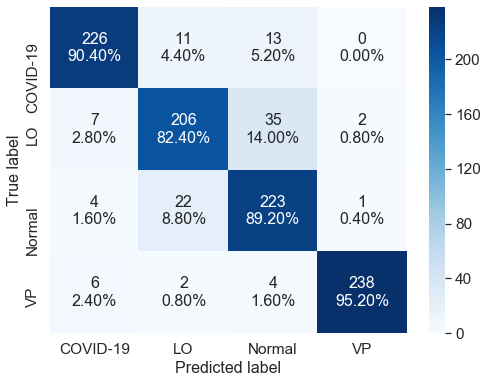

In [23]:
## Confusion matrix with 7k COVID and original real data for all four classes
y_covid7k = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\Fianl project\classification_blended_covid7k.xlsx", "in")
temp_5 = y_covid7k.iloc[:,1]
for column in range(2,len(y_covid7k.columns)):
    temp_5 = temp_5.append(y_covid7k.iloc[:,column])
cf_matrix_3 = confusion_matrix(temp_1.values.copy(),temp_5.values.copy())
print(cf_matrix_3)

categories_3 = ["COVID-19","LO","Normal","VP"]

make_confusion_matrix(cf_matrix_3,categories=categories_3, figsize=(8,6), sum_stats=False)

[[222  18  10   0]
 [  5 203  42   0]
 [  3  24 222   1]
 [  8   9   7 226]]


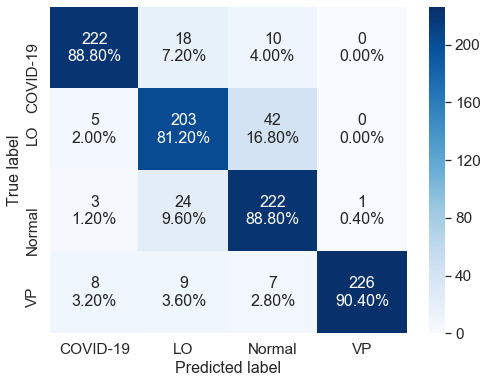

In [24]:
## Confusion matrix with 7k Lung and original real data for all four classes
y_lung7k = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\Fianl project\classification_blended_lung7k.xlsx", "in")
temp_6 = y_lung7k.iloc[:,1]
for column in range(2,len(y_lung7k.columns)):
    temp_6 = temp_6.append(y_lung7k.iloc[:,column])
cf_matrix_4 = confusion_matrix(temp_1.values.copy(),temp_6.values.copy())
print(cf_matrix_4)

categories_4 = ["COVID-19","LO","Normal","VP"]

make_confusion_matrix(cf_matrix_4,categories=categories_4, figsize=(8,6), sum_stats=False)

[[226  24]
 [ 17 733]]


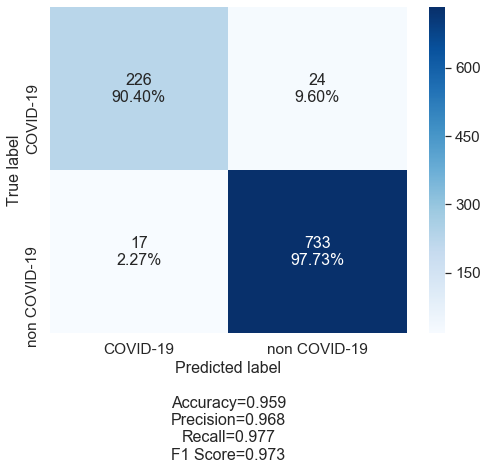

In [25]:
## Confusion matrix with 7k COVID and original real data for COVID-19 and non-COVID-19
temp_7 = temp_5.copy()
temp_7[temp_7>0] = 1
cf_matrix_5 = confusion_matrix(temp_3.values.copy(),temp_7.values.copy())
print(cf_matrix_5)

categories_5 = ["COVID-19","non COVID-19"]
make_confusion_matrix(cf_matrix_5,categories=categories_5, figsize=(8,6))

[[238   6   6   0]
 [ 14 202  31   3]
 [  6  13 229   2]
 [  3   3   3 241]]


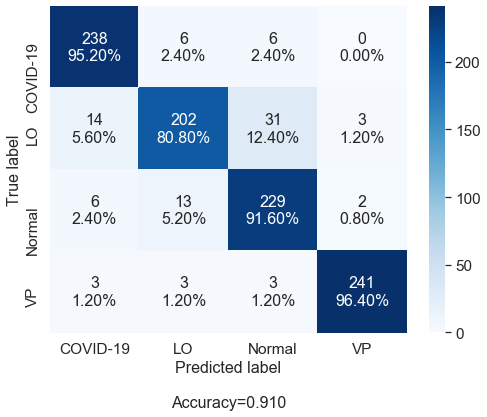

In [26]:
## Confusion matrix with 7k COVID and viral and original real data for all four classes
y_co_vi_7k = pd.read_excel(r"C:\Users\mama\OneDrive - HKUST Connect\UST\Study\Year 2 sem 2\CSIC 5011\Fianl project\classification_blended_covid7k_viral7k.xlsx", "in")
temp_8 = y_co_vi_7k.iloc[:,1]
for column in range(2,len(y_co_vi_7k.columns)):
    temp_8 = temp_8.append(y_co_vi_7k.iloc[:,column])
cf_matrix_6 = confusion_matrix(temp_1.values.copy(),temp_8.values.copy())
print(cf_matrix_6)

categories_6 = ["COVID-19","LO","Normal","VP"]

make_confusion_matrix(cf_matrix_6,categories=categories_6, figsize=(8,6), sum_stats=True)

[[238  12]
 [ 23 727]]


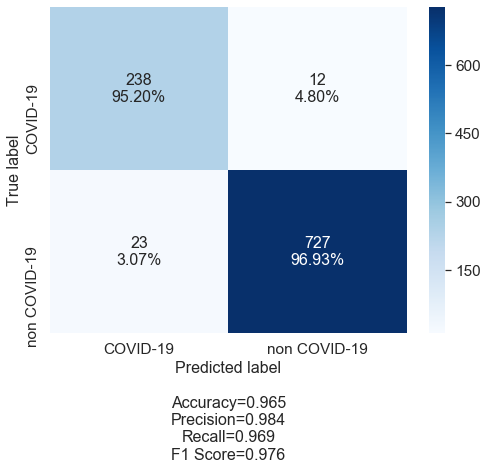

In [27]:
## Confusion matrix with 7k COVID and viral and original real data for COVID-19 and non-COVID-19
temp_9 = temp_8.copy()
temp_9[temp_9>0] = 1
cf_matrix_7 = confusion_matrix(temp_3.values.copy(),temp_9.values.copy())
print(cf_matrix_7)

categories_7 = ["COVID-19","non COVID-19"]
make_confusion_matrix(cf_matrix_7,categories=categories_7, figsize=(8,6))